### 최대하강법 구현하기

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x0, Delta, Tolerance = 2, 0.4, 0.005

In [3]:
def grad(x):
    return 2 * x

In [4]:
xs = []
x_prev = x0

for cnt in range(0, 100):
    cnt += 1
    xs.append(x_prev)
    x_curr = x_prev - 2 * Delta * grad(x_prev)
    diff = np.abs(x_curr - x_prev)
    if diff <= Tolerance:
        break
    x_prev = x_curr

print("이터레이션 횟수:", cnt)
print("x_curr의 값:", x_curr)

이터레이션 횟수: 14
x_curr의 값: 0.0015672832819200039


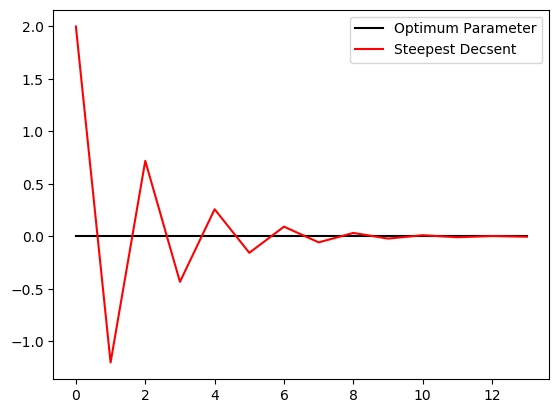

In [5]:
plt.plot([i for i in range(cnt)], [0] * cnt, 'k', label='Optimum Parameter')
plt.plot([i for i in range(cnt)], xs, 'r', label='Steepest Decsent')
plt.legend()

### 3.2.3 로지스틱 회귀 모델 구현하기

In [7]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

X, y = load_breast_cancer(return_X_y=True, as_frame = False)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=1234)

X_train, X_test = X_train[:, :3], X_test[:, :3]
y_train, y_test = y_train.reshape(-1, 1), y_test.reshape(-1, 1)

In [8]:
train_mean, train_std = X_train.mean(axis=0), X_train.std(axis=0)

X_train, X_test = (X_train - train_mean) / train_std, (X_test -
                                                       train_mean) / train_std

n, n_test = X_train.shape[0], X_test.shape[0]
X_train, X_test = np.append(np.ones((n, 1)), X_train,
                            axis=1), np.append(np.ones((n_test, 1)),
                                               X_test,
                                               axis=1)

In [9]:
max_iter = 10000
Tolerance = 0.0001

In [10]:
beta_old = np.ones((4, 1))

In [11]:
for cnt in range(1, max_iter):
    W = np.zeros((n, n))
    p = np.zeros((n, 1))
    
    for i in range(n):
        xb = np.exp((X_train[i].reshape(1, -1) @ beta_old)[0][0])
        pi = xb / (1 + xb)
        
        W[i][i] = pi * (1 - pi)
        p[i] = pi
    
    left = np.linalg.inv(X_train.T @ W @ X_train)
    right = X_train.T @ (y_train - p)
    
    update = 0.0001 * (left @ right)
    beta_new = beta_old + update
    
    if (np.linalg.norm(update) < Tolerance): break
    if cnt % 1000 == 0: 
        print(f'이터레이션: {cnt}, 업데이트 크기:{np.linalg.norm(update)}')
    beta_old = beta_new

print(f'이터레이션: {cnt}, 업데이트 크기: {np.linalg.norm(update)}')
print('\n학습한 파라미터:\n', beta_new)

이터레이션: 1000, 업데이트 크기:0.001476582098969821
이터레이션: 2000, 업데이트 크기:0.000828819494701221
이터레이션: 3000, 업데이트 크기:0.0005888637557052267
이터레이션: 4000, 업데이트 크기:0.0005016460961680756
이터레이션: 5000, 업데이트 크기:0.0004805887201861744
이터레이션: 6000, 업데이트 크기:0.0004921690754541083
이터레이션: 7000, 업데이트 크기:0.0005216582869965073
이터레이션: 8000, 업데이트 크기:0.0005614510237058704
이터레이션: 9000, 업데이트 크기:0.0006068663712746636
이터레이션: 9999, 업데이트 크기: 0.0006545214496912951

학습한 파라미터:
 [[ 4.96797147e-01]
 [ 5.07895925e+00]
 [ 2.20184378e-03]
 [-5.65908436e+00]]


In [12]:
right = 0
for i in range(X_train.shape[0]):
    xb = np.exp((X_train[i].reshape(1, -1) @ beta_old)[0][0])
    pi = xb / (1 + xb)
    if (pi >= 0.5 and y_train[i] == 1) or (pi < 0.5 and y_train[i] == 0): 
        right += 1

print(f'학습 데이터셋 정확도:{right / X_train.shape[0] * 100: .2f}%')

right = 0
for i in range(X_test.shape[0]):
    xb = np.exp((X_test[i].reshape(1, -1) @ beta_old)[0][0])
    pi = xb / (1 + xb)
    if (pi >= 0.5 and y_test[i] == 1) or (pi < 0.5 and y_test[i] == 0): right += 1
        
print(f'테스트 데이터셋 정확도:{right / X_test.shape[0] * 100: .2f}%')

학습 데이터셋 정확도: 84.51%
테스트 데이터셋 정확도: 76.06%


### [예제 3.1] LogisticRegression 클래스 사용하기

In [13]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X, y = load_breast_cancer(return_X_y=True, as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=1234)

X_train = X_train.iloc[:, :3]
X_test = X_test.iloc[:, :3]

In [14]:
clf = LogisticRegression(random_state=1234, C=100000)

clf = clf.fit(X_train, y_train)
y_train_pred = clf.predict(X_train)

y_pred = clf.predict(X_test)

print(f'학습 데이터셋 정확도:{(y_train == y_train_pred).sum() / len(y_train) * 100: .2f}%')
print(f'테스트 데이터셋 정확도:{(y_test == y_pred).sum() / len(y_test) * 100: .2f}%')

학습 데이터셋 정확도: 93.18%
테스트 데이터셋 정확도: 87.23%


### [예제 3.2] 피처 스케일링과 학습 파이프라인

In [15]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X, y = load_breast_cancer(return_X_y=True, as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=1234)

In [16]:
scaler = StandardScaler()
clf = LogisticRegression(random_state=1234, solver='sag')
pipe = Pipeline(steps=[("scaler", scaler), ("clf", clf)])

pipe.fit(X_train, y_train)

c:\python37\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', LogisticRegression(random_state=1234, solver='sag'))])

In [17]:
y_pred = pipe.predict(X_test)

print(f'정확도:{(y_pred == y_test).mean() * 100: .2f}%')

정확도: 94.68%


## 03 되새김 문제

### [되새김 문제 3.1] LogisticRegression 클래스 적용하기

#### 문제

In [18]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score

X, y = load_iris(return_X_y=True, as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=1234)

#### 풀이

In [19]:
scaler = MinMaxScaler()
clf = LogisticRegression(random_state=1234, solver='saga')
pipe = Pipeline(steps=[("scaler", scaler), ("clf", clf)])

y_pred = pipe.fit(X_train, y_train).predict(X_test)

pre = precision_score(y_test, y_pred, average = None)
print(f'정밀도:{pre[1]*100: .2f}%')

정밀도: 94.12%


### [되새김 문제 3.2] 로지스틱 회귀 모델용 데이터셋 생성하기

#### 문제

In [20]:
import numpy as np
import pandas as pd

n = 300
np.random.seed(1234)
X1 = np.random.normal(0, 1, size=n)
X2 = np.random.normal(0, 1, size=n)
X3 = np.random.normal(0, 1, size=n)
X4 = np.random.normal(0, 1, size=n)
X5 = np.random.normal(0, 1, size=n)

X = pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3, 'X4': X4, 'X5': X5})

#### 풀이

In [21]:
ys = []
intercept = -2
beta = np.array([[-2, -2, 3, 4, 5]]).reshape(-1, 1)

np.random.seed(1111)
for i in range(n):
    xb = np.exp((intercept + (X.iloc[i].values.reshape(1, -1) @ beta)[0][0]) + 
                np.random.normal(0, 7.5))
    pi = xb / (1 + xb)
    if pi >= 0.5: y = 1
    else: y = 0
    ys.append(y)
y = pd.Series(ys)

In [22]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=1234)
clf = clf.fit(X, y)

print(f'절편: {clf.intercept_[0]}')
print(f'계수: {clf.coef_[0]}')

y_pred = clf.predict(X)

print(f'정확도:{(y == y_pred).mean() * 100: .2f}%')

절편: -0.578686940895635
계수: [-0.52203159 -0.51494024  0.71392631  1.05416056  1.06007824]
정확도: 78.00%
